# Code for figures generation for the TOCHI draft.
 This notebook contains the source code with the quantitative results in the ICSE submission draft were generated.

## Reading the source file

In [ ]:
from google.colab import files
import pandas as pd

# Upload a CSV file
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the CSV file into a DataFrame
#df = pd.read_csv(file_name)
# Read the CSV file into a DataFrame
df = pd.read_csv('IndividualAOImetrics (2).csv')

# Display the DataFrame
df.head()

Saving IndividualAOImetrics (2).csv to IndividualAOImetrics (2).csv


,Study Name,Respondent Name,Respondent Gender,Respondent Age,Respondent Group,Gaze Calibration,Type,Group,Label,Start,...,Saccade count,Entry saccade onset (AOI),Entry saccade onset (Parent),Duration of average saccade,Amplitude of average saccade,Peak velocity of average saccade,Peak acceleration of average saccade,Peak deceleration of average saccade,Direction of average saccade,Mouse click count
0,ChatGPTSeperated,fr872,MALE,25,PhD student,Good,Stimulus,NaN,Exercise 1,480.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ChatGPTSeperated,fr872,MALE,25,PhD student,Good,Gazemapping,NaN,exercise1,8660.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ChatGPTSeperated,fr872,MALE,25,PhD student,Good,Static AOI,NaN,ChatGPT,8660.78,...,295.0,3558.79,3558.79,35.11,3.09,99.73,4029.38,-3314.32,183.00,19.0
3,ChatGPTSeperated,fr872,MALE,25,PhD student,Good,Static AOI,NaN,Colab,8660.78,...,521.0,NaN,NaN,35.79,4.17,112.49,4408.89,-4496.39,193.05,25.0
4,ChatGPTSeperated,fr872,MALE,25,PhD student,Good,Stimulus,NaN,Exercise 2,305078.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Adjusting the categories naming
To suit the naming conventions of the TOCHI draft. Also correcting some of the eroneous entries by the participants who forgot to enter their category.

In [ ]:
replacement_mapping = {
    'Default': 'Juniors',
    '2026': 'Sophomores',
    'PhD student': 'PhD Students',
    'Research Assistant': 'Graduates',
    '2024': 'Seniors'
}

# Replace the values in the 'category' column
df['Respondent Group'] = df['Respondent Group'].replace(replacement_mapping)

## Figure 3

<ipython-input-29-bcbd144e90cb>:61: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


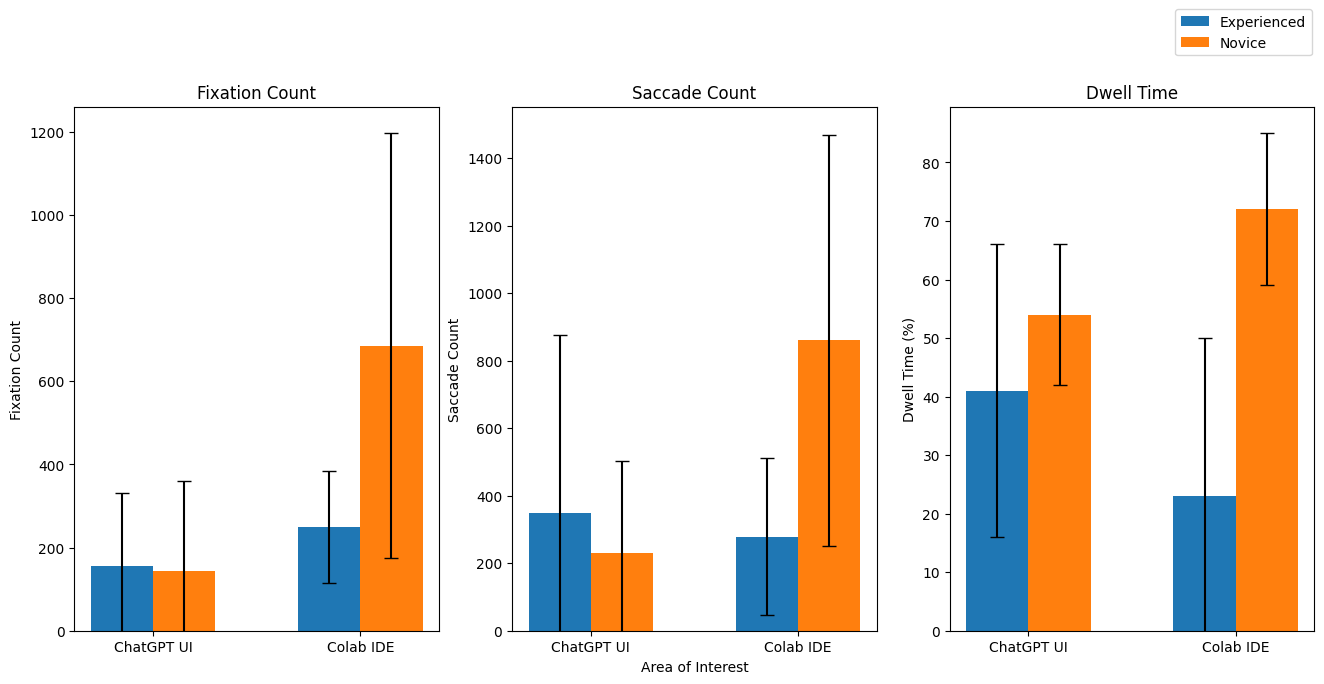

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
data = {
    'Group': ['ChatGPT UI', 'Colab IDE', 'ChatGPT UI', 'Colab IDE'],
    'Skill Level': ['Novice', 'Novice', 'Experienced', 'Experienced'],
    'Fixation Count': [156, 144, 249, 686],
    'Fixation SD': [176, 134, 216, 510],  # Standard deviation for Fixation Count
    'Dwell Time (%)': [41, 54, 23, 72],
    'Dwell Time SD': [25, 27, 12, 13],  # Standard deviation for Dwell Time (%)
    'Saccade Count': [349, 229, 279, 860],
    'Saccade SD': [527, 233, 274, 609]  # Standard deviation for Saccade Count
}

# Extracting unique groups and skill levels
groups = sorted(set(data['Group']))
skill_levels = sorted(set(data['Skill Level']))

# Bar positions
bar_width = 0.3
index = np.arange(len(groups))

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(16, 6.8))

# Plotting fixation count
axs[0].bar(index, data['Fixation Count'][::2], bar_width, label='Novice', yerr=[np.maximum(data['Fixation SD'][0], 0), np.maximum(data['Fixation SD'][1], 0)], capsize=5)
axs[0].bar(index + bar_width, data['Fixation Count'][1::2], bar_width, yerr=[np.maximum(data['Fixation SD'][2], 0), np.maximum(data['Fixation SD'][3], 0)], capsize=5)
#axs[0].set_xlabel('Group')
axs[0].set_ylabel('Fixation Count')
axs[0].set_title('Fixation Count')
axs[0].set_xticks(index + bar_width / 2)
axs[0].set_xticklabels(groups)

# Plotting saccade count
axs[1].bar(index, data['Saccade Count'][::2], bar_width, yerr=[np.maximum(data['Saccade SD'][0], 0), np.maximum(data['Saccade SD'][1], 0)], capsize=5)
axs[1].bar(index + bar_width, data['Saccade Count'][1::2], bar_width, yerr=[np.maximum(data['Saccade SD'][2], 0), np.maximum(data['Saccade SD'][3], 0)], capsize=5)
axs[1].set_xlabel('Area of Interest')
axs[1].set_ylabel('Saccade Count')
axs[1].set_title('Saccade Count')
axs[1].set_xticks(index + bar_width / 2)
axs[1].set_xticklabels(groups)

# Plotting dwell time
axs[2].bar(index, data['Dwell Time (%)'][::2], bar_width, yerr=[np.maximum(data['Dwell Time SD'][0], 0), np.maximum(data['Dwell Time SD'][1], 0)], capsize=5)
axs[2].bar(index + bar_width, data['Dwell Time (%)'][1::2], bar_width, yerr=[np.maximum(data['Dwell Time SD'][2], 0), np.maximum(data['Dwell Time SD'][3], 0)], capsize=5)
#axs[2].set_xlabel('Group')
axs[2].set_ylabel('Dwell Time (%)')
axs[2].set_title('Dwell Time')
axs[2].set_xticks(index + bar_width / 2)
axs[2].set_xticklabels(groups)

# Add a legend outside of the plots
axs[0].legend(['Experienced', 'Novice'], loc='upper left', bbox_to_anchor=(3, 1.2))

# Ensure y-axis starts at 0
for ax in axs:
    ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()


## Figure 4

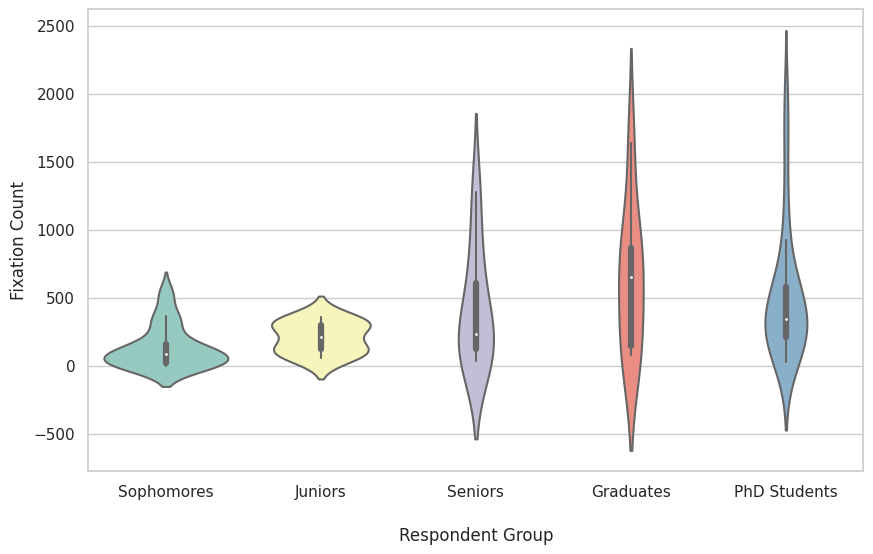

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Define the order of categories
category_order = ['Sophomores', 'Juniors', 'Seniors', 'Graduates', 'PhD Students']

# Set Seaborn style
sns.set(style="whitegrid")

# Create a violin plot with specified category order
plt.figure(figsize=(10, 6))
sns.violinplot(x='Respondent Group', y='Fixation count', data=df, palette='Set3', order=category_order)

# Set labels and title
plt.xlabel('\nRespondent Group')
plt.ylabel('Fixation Count')
#plt.title('Violin Plot of Fixation Count by Category with Mean/SD Annotations')

# Show the plot
plt.show()
